In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper functions

In [0]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [0]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

Let's import the dataset by cloning a local repository which has the copy of the above dataset. This helps in easy access throughout the notebook

In [4]:
!git clone https://github.com/priyanka-debnath/cs6220-sp20.git

Cloning into 'cs6220-sp20'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 134 (delta 3), reused 133 (delta 2), pack-reused 0
Receiving objects: 100% (134/134), 7.22 MiB | 17.64 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Now lets move the images folder to the working directory

In [0]:
!mv '/content/cs6220-sp20/datasets/images' '/content/'

In [0]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
season_images = load_images(img_dir) # load images in the specified directory

In [34]:
season_data = pd.DataFrame([i.histogram() for i in season_images])
season_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,9,5,12,21,20,39,42,56,76,66,67,60,33,35,44,33,40,32,29,36,32,17,20,21,21,14,7,10,11,7,8,15,6,6,9,3,4,7,5,10,...,3,5,1,2,6,2,0,2,3,3,4,3,5,5,1,4,2,5,5,7,3,3,0,4,2,2,8,5,5,10,3,8,8,7,15,28,6,24,7,112
1,28,24,15,18,24,14,27,34,37,32,39,37,36,47,50,45,51,56,61,61,70,70,76,77,73,83,98,68,80,72,72,61,62,53,51,50,46,40,37,38,...,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10,5,6,3,14,12,20,43,61,70,37,36,26,27,14,16,19,19,19,16,14,15,22,11,17,23,24,11,25,13,19,19,13,17,21,23,15,21,13,21,...,61,91,107,111,105,117,119,130,104,120,96,102,114,111,103,89,107,94,99,89,92,56,72,60,52,32,38,31,29,21,21,13,12,10,13,13,3,10,0,19
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,1,2,3,1,3,6,10,8,14,11,11,14,13,16,17,24,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,2,1,3,2,9,3,1,9,2,4,6,11,9,6,12,7,10,11,9,5,4,10,9,...,0,1,2,0,1,1,1,0,1,1,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


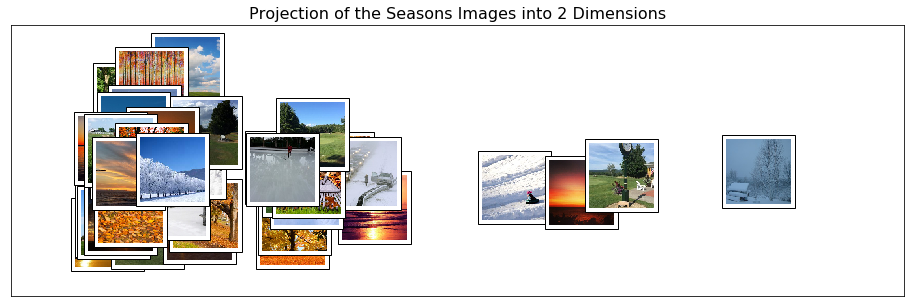

In [37]:
plot_image_space(season_images, season_data, title="Projection of the Seasons Images into 2 Dimensions")

# Part1 [25pts]:

###The PCA projection of the image color histograms in 2 dimensions. Using the provided plot image space() function. This should be displayed as thumbnail images distributed within a 2-dimensional plot. You will need to use PCA, which is implemented in scikit-learn. See this link for documentation here (http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

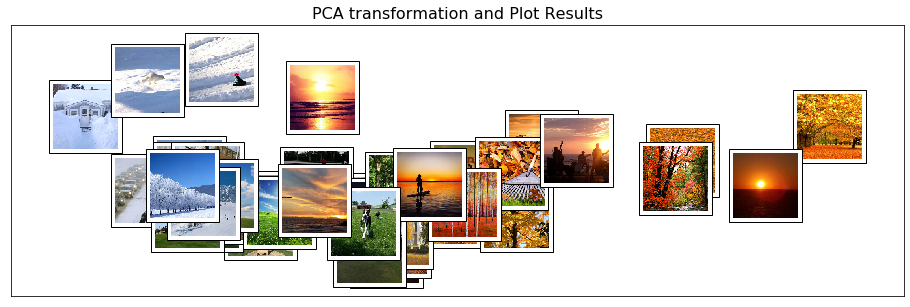

In [38]:
from sklearn import (decomposition, manifold)
# Generate PCA tranformation and plot results
pca = decomposition.PCA(n_components=2)
season_data_pca = pca.fit_transform(season_data)

# Plot PCA result
plot_image_space(season_images, season_data_pca, 'PCA transformation and Plot Results')

# Part2 [25pts]:

###Given this output, What does it mean for two images to be close together in this plot? What does it mean for two images to be far apart?

We can see that since the plot is based off of RGB values taken as features, PCA on this dataframe selects features that best describe the image. Hence 2 images which are close together have similar color schemes or pixel alignment, or in the bigger sense of the term in current context, belong to the same season.

This also means, that 2 images to be far apart in this plot means that they have different color schemes and so they could be of 2 different seasons.

# Part3 [50pts]:

###Once you completed the first two parts of the assignment, choose one of the following below:



###1. Repeat this process while using a different set of images curated by yourself.
###2. Repeat this process using a different data reduction method and describe any similarities/differences between that experiment when compared to applying PCA.



I am performing similar analysis with a different set of Fruits images that I have consolidated from a fruit images dataset. There are 65 images in total in this dataset taken for different kinds of fruits. The images folder can be found at : https://github.com/priyanka-debnath/cs6220-sp20/tree/master/datasets/fruits

Citation: The original datasource is from
**Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.**

Let us import tha fruits images folder into our working directory.

In [39]:
!mv '/content/cs6220-sp20/datasets/fruits' '/content/'

mv: cannot stat '/content/cs6220-sp20/datasets/fruits': No such file or directory


Now lets load the fruits data.

In [0]:
fruits_dir = os.path.join(os.getcwd(), "fruits") # directory path
fruit_images = load_images(fruits_dir) # load images in the specified directory

In [41]:
fruit_data = pd.DataFrame([i.histogram() for i in fruit_images])
fruit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0,0,0,0,0,0,0,0,1,3,8,13,16,12,19,9,11,22,23,41,50,45,70,55,49,69,90,63,46,51,47,47,53,52,37,41,35,40,41,56,...,2,0,0,0,1,1,1,4,1,3,2,7,15,16,7,10,3,2,1,3,3,3,1,2,13,6,3,6,4,3,4,1,15,13,40,88,51,271,80,1949
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,1,0,1,1,...,5,7,1,7,6,7,4,5,6,6,6,3,4,3,4,4,5,7,2,6,10,5,9,7,5,19,15,21,28,26,59,27,99,40,133,190,39,255,48,2286
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,2,4,3,6,3,3,5,4,6,5,0,2,2,9,3,5,3,6,7,3,4,6,2,6,9,7,4,7,2,10,7,16,10,34,101,55,360,85,3506
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,6,2,3,7,12,4,13,10,25,18,28,27,16,...,1,1,0,0,1,0,1,1,2,1,0,1,0,0,1,1,0,0,1,0,1,1,1,3,1,0,2,4,11,6,16,6,37,31,71,122,45,427,101,3554
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,2,4,3,4,2,4,1,2,0,1,2,1,1,4,2,1,3,6,3,2,2,4,5,4,3,3,2,5,11,15,47,85,56,246,86,4091


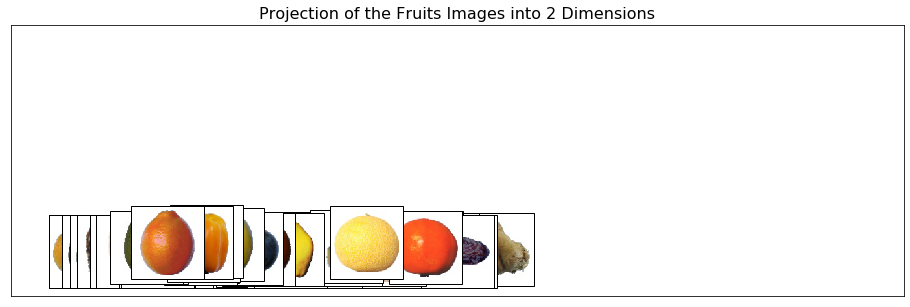

In [42]:
plot_image_space(fruit_images, fruit_data, title="Projection of the Fruits Images into 2 Dimensions")

On plotting them, we observed that almost all the images overlapped each other and we couldn't get any proper division here.

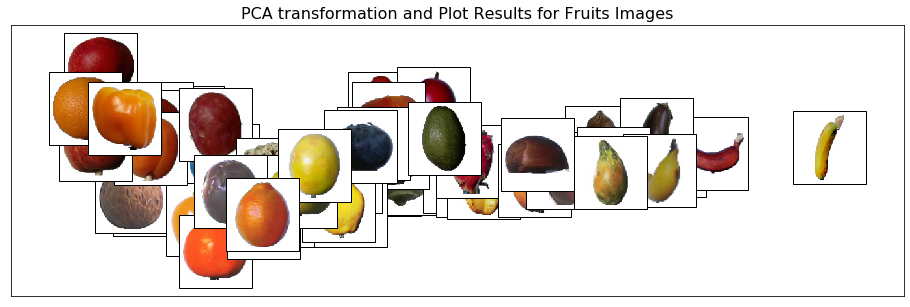

In [43]:
# Generate PCA tranformation and plot results
fruit_data_pca = pca.fit_transform(fruit_data)

# Plot PCA result
plot_image_space(fruit_images, fruit_data_pca, 'PCA transformation and Plot Results for Fruits Images')

We see that on calculating the PCA on the fruits dataset, the more round and red/orange fruits are grouped together on the left while the eliiptical or longer fruits are on the right side. There is also a clear color scheme switch from left to right.

Now we perform the comparative study for Locally Linear Embedding analysis for the 2 datasets.

Below is the plot for the Locally Linear Embedding Analysis for Fruits images dataset.

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

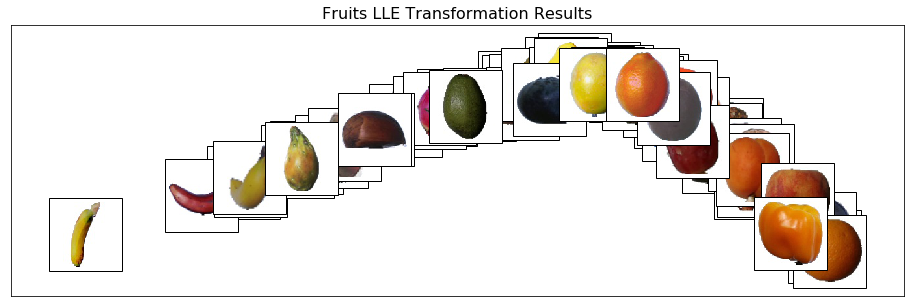

In [45]:
model = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='modified')
fruits_lle = model.fit_transform(fruit_data)

plot_image_space(fruit_images, fruits_lle, 'Fruits LLE Transformation Results')

And then we perform Locally Linear Embedding analysis for the given image set to get the below plot.

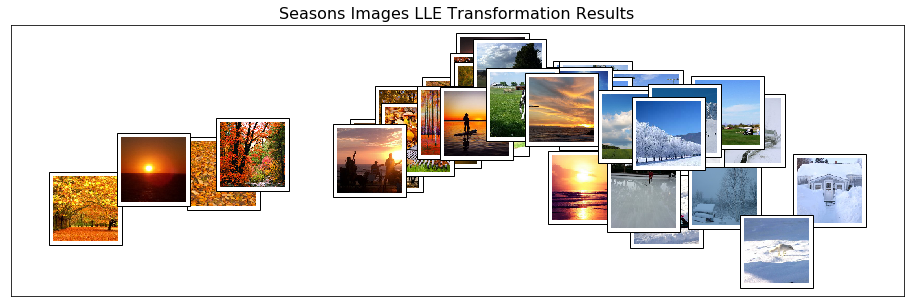

In [46]:
model = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='modified')
seasons_lle = model.fit_transform(season_data)

plot_image_space(season_images, seasons_lle, 'Seasons Images LLE Transformation Results')